In [1]:
!pip install wordcloud

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

sns.set_style('darkgrid')

In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [6]:
print(movies.shape)
print(ratings.shape)

(10329, 3)
(105339, 4)


In [7]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [9]:
totalgenres=[]
for g in movies.genres:
    g=g.split('|')
    if g not in totalgenres:
        totalgenres.append(g)

In [10]:
totalgenres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['

In [14]:
movies.title[0][:-7]

'Toy Story'

In [15]:
year, title = [], []
for t in movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [16]:
year[:5], title[:5]

([' (1995)', ' (1995)', ' (1995)', ' (1995)', ' (1995)'],
 ['Toy Story',
  'Jumanji',
  'Grumpier Old Men',
  'Waiting to Exhale',
  'Father of the Bride Part II'])

In [20]:
cloudgenre = WordCloud(width=1500, height=800, background_color = 'black', min_font_size=2, 
                      min_word_length=3).generate(str(totalgenres))
cloudtitle = WordCloud(width=1500, height=800, background_color='cyan', min_font_size=2,
                      min_word_length=3).generate(str(title))

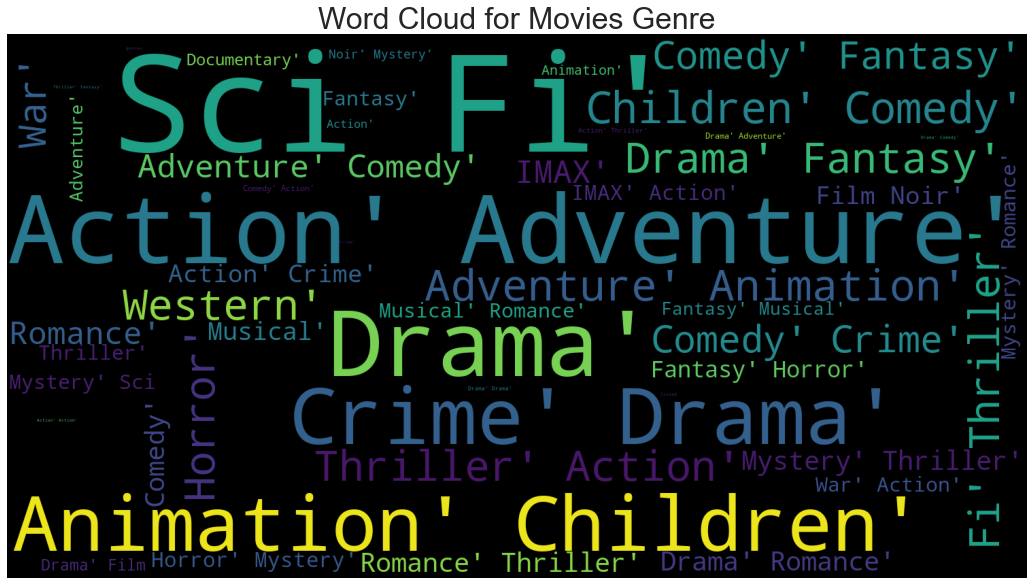

In [22]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(cloudgenre);

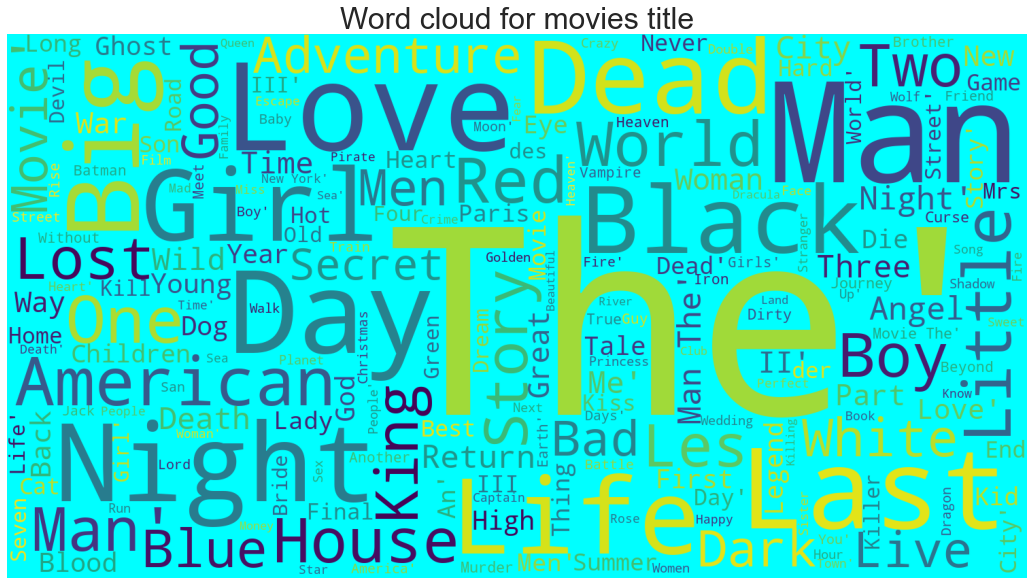

In [21]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word cloud for movies title', fontsize=30)
plt.imshow(cloudtitle)

In [23]:
finaldata = pd.merge(ratings, movies, how='left', on='movieId')

In [25]:
finaldata.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [26]:
ratings = finaldata.groupby(['title'])[['rating']].sum()
ratings = ratings.nlargest(10,'rating')
ratings.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

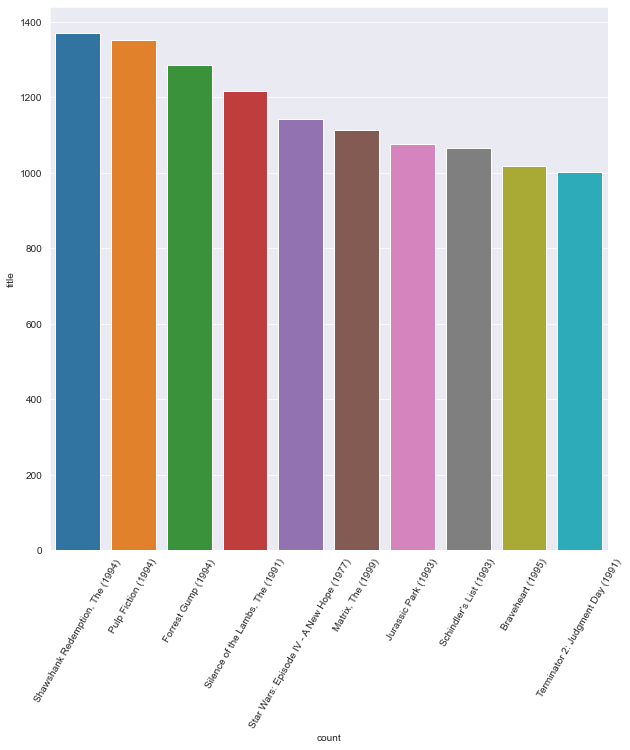

In [27]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=60)
sns.barplot(ratings.index, ratings['rating'])
plt.ylabel('title')
plt.xlabel('count')

In [28]:
tfidf = TfidfVectorizer()
tfidfmatrix = tfidf.fit_transform(movies['genres'])

In [29]:
users = finaldata.pivot_table(index='userId', columns='title', values = 'rating')
users.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
similarity = linear_kernel(tfidfmatrix, tfidfmatrix)

In [33]:
indices = pd.Series(movies.index, index = movies['title'])
titles = movies['title']
def recomsys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x:x[1], reverse = True)
    similarity_scores = similarity_scores[1:21]
    mov_ind = [i[0] for i in similarity_scores]
    return titles.iloc[mov_ind]

In [36]:
#recommendation of movies which are similar to the movie which we enter inside the braces
recomsys('Le Grand Restaurant (1966)')

17                                     Four Rooms (1995)
18                 Ace Ventura: When Nature Calls (1995)
60                                       Bio-Dome (1996)
63                                         Friday (1995)
81                                    Black Sheep (1996)
92                                      Mr. Wrong (1996)
94                                  Happy Gilmore (1996)
103    Happiness Is in the Field (Bonheur est dans le...
111                        Flirting With Disaster (1996)
116                                Down Periscope (1996)
120                                 Birdcage, The (1996)
121                        Brothers McMullen, The (1995)
149                                     Jury Duty (1995)
151                            Living in Oblivion (1995)
162                                    Party Girl (1995)
175    To Wong Foo, Thanks for Everything! Julie Newm...
188                                 Billy Madison (1995)
194                            